In [30]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
from sklearn.metrics import pairwise_distances, euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from tensorflow import keras
from scipy import stats
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.spatial import distance
from sklearn.datasets import fetch_openml
from scipy.sparse import csr_matrix
from sklearn.preprocessing import normalize
from sklearn.utils import shuffle
from sklearn import metrics
from statistics import mean

# Problem 1: Aminer : basic dataset analysis

In [31]:
with open('/content/drive/MyDrive/acm.txt', 'r+',  encoding="utf8") as f:
  articles=f.readlines()
  articles=[x.strip() for x in articles]

In [32]:
articles[:22]

['#*MOSFET table look-up models for circuit simulation',
 '#t1984',
 '#cIntegration, the VLSI Journal',
 '#index1',
 '',
 '#*The verification of the protection mechanisms of high-level language machines',
 '#@Virgil D. Gligor',
 '#t1984',
 '#cInternational Journal of Parallel Programming',
 '#index2',
 '',
 '#*Another view of functional and multivalued dependencies in the relational database model',
 '#@M. Gyssens, J. Paredaens',
 '#t1984',
 '#cInternational Journal of Parallel Programming',
 '#index3',
 '',
 '#*Entity-relationship diagrams which are in BCNF',
 '#@Sushil Jajodia, Peter A. Ng, Frederick N. Springsteel',
 '#t1984',
 '#cInternational Journal of Parallel Programming',
 '#index4']

# A)

In [33]:
authors = set()
venues = set()
publications = set()
citations = set()
index = ""

In [34]:
for i in range(len(articles)):
  line=articles[i]
  if line.startswith("#index"):
    index = line[6:]
    publications.add(line) 

  elif line.startswith("#@"):
    for auth in line[2:].split(";"):
      authors.add(auth.strip())

  elif line.startswith("#c"):
    venues.add(line)
        
  elif line.startswith("#%"):
    citations.add(index+line)

In [35]:
print("Total number of Distinct Authors :-" , len(authors))
print("Total number of Venues:-" , len(venues))
print("Total number of Publications:-" , len(publications))
print("Total number of Citations/Referenes:-" , len(citations))

Total number of Distinct Authors :- 1670285
Total number of Venues:- 273329
Total number of Publications:- 2385057
Total number of Citations/Referenes:- 9671893


# B)

In [49]:
pubs_venue = set()

for pubs in articles:
  if pubs.startswith("#c"):
    if "Principles and Practice of Knowledge Discovery in Databases" in pubs:
      venue = pubs[2:]
      pubs_venue.add(venue)

print("Venues lists are:  \n")
for venue in pubs_venue:            
    print(venue)

Venues lists are:  

PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases
Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)
PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases
PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases
Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)


*These numbers are not likely to be accurate since the raw data is not clean. For the same conference, we can see that venues are different which will increase our count of venues rather than actual count as it is not consistent.*


# C)

In [ ]:
pubs_author = {}

for line in articles:
  if line.startswith("#@"):
    for auth in line[2:].split(";"):
      if pubs_author.get(auth.strip()) == None:
        pubs_author[auth.strip()] = 1

      else:
        pubs_author[auth.strip()]  += 1
                    
authors = list(pubs_author.keys())
publications = list(pubs_author.values())

# Removing null values for author and it's respective publication

index = authors.index("")
del authors[index]
del publications[index]

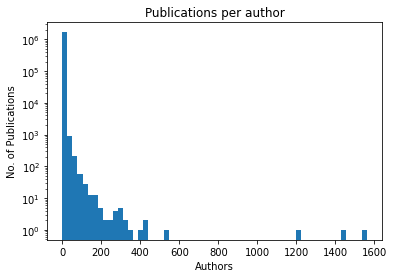

In [ ]:
plt.xlabel('Authors')
plt.ylabel('No. of Publications')
plt.title('Publications per author')
plt.hist(publications, bins= 60, log = True)
plt.show()

# D)

In [ ]:
print("Mean:", np.mean(publications))
print("Standard Deviation:", np.std(publications))
print("1st Quartile:", np.percentile(publications, 25))
print("Median:", np.percentile(publications, 50))
print("3rd Quartile:", np.percentile(publications, 75))

Mean: 1.3374917079969635
Standard Deviation: 2.8744565757272094
1st Quartile: 1.0
Median: 1.0
3rd Quartile: 1.0


*The mean is higher than the median and infact greater than the Q3 value that means that a lot of values in upper quantile are greater than the Q3 value and infact the mean.*

*This is because of some outliers that can be seen in the histogram having publications between 1400-1600 which makes the standard deviation higher implying existence of higher values deviating mean from the median.*

# E)

In [16]:
pubs_venue_ = {}

for line in articles:
  if line.startswith("#c"):
    if pubs_venue_.get(line[2:]) == None:
        pubs_venue_[line[2:]] = 1

    else:
        pubs_venue_[line[2:]] += 1
                    
venues = list(pubs_venue_.keys())
v_pub = list(pubs_venue_.values())

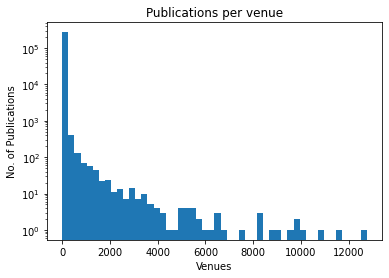

In [ ]:
plt.xlabel('Venues')
plt.ylabel('No. of Publications')
plt.title('Publications per venue')
plt.hist(v_pub, bins = 50, log = True)
plt.show()

In [ ]:
print("Mean:", np.mean(v_pub))
print("Standard Deviation:", np.std(v_pub))
print("1st Quartile:", np.percentile(v_pub, 25))
print("Median:", np.percentile(v_pub, 50))
print("3rd Quartile:", np.percentile(v_pub, 75))

Mean: 8.725484672317975
Standard Deviation: 106.7958346761743
1st Quartile: 1.0
Median: 1.0
3rd Quartile: 1.0


In [ ]:
print("Venue with largest no. of publications:", venues[v_pub.index(max(v_pub))])

Venue with largest no. of publications: IEEE Transactions on Information Theory


*Venue with the largest number of publications in the dataset: IEEE Transactions on Information Theory*

# F)

In [10]:
ref = {}
cite = {}
cite_venue_count = {}
cite_venue = {}
pubs = {}

for line in articles:
        if line.startswith("#index"):
            index = int(line[6:])
        elif line.startswith("#c"):
            venue = line[2:]
            if pubs.get(index) == None:
                pubs[index] = venue
        elif line.startswith("#%"):
            if ref.get(index) == None:
                ref[index] = 1
            else :
                ref[index] += 1
                
            if cite.get(int(line[2:])) == None:
                cite[int(line[2:])] = 1
            else:
                cite[int(line[2:])]  += 1 
            
            cite_venue = pubs.get(int(line[2:]))
            
            if cite_venue_count.get(cite_venue) == None:
                cite_venue_count[cite_venue] = 1
            else:
                cite_venue_count[cite_venue] += 1

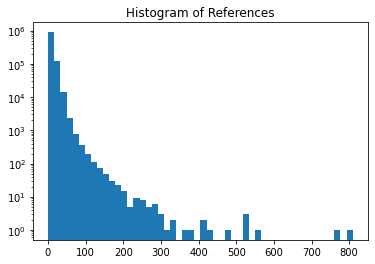

In [11]:
plt.title('Histogram of References')
plt.hist(list(ref.values()),bins = 50, log=True)
plt.show()

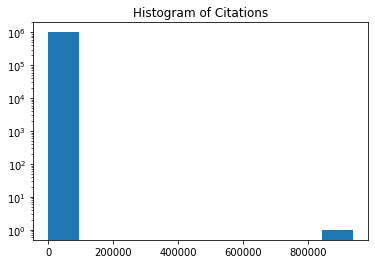

In [12]:
plt.title('Histogram of Citations')
plt.hist(list(cite.values()), bins = 10 ,log=True)
plt.show()

In [13]:
print("Publication index, maximum references:" , list(ref.keys())[list(ref.values()).index(max(list(ref.values())))] ,max(list(ref.values())))

Publication index, maximum references: 2015217 809


In [14]:
print("Publication index,  maximum citations:" , list(cite.keys())[list(cite.values()).index(max(list(cite.values())))] ,max(list(cite.values())))

Publication index,  maximum citations: 2135000 938039


# G)

In [17]:
venue_impact = {}
for ven in cite_venue_count.keys():   
    venue_impact[ven] = 0    
    if venue != 'None' and pubs_venue_.get(ven) != None :
        venue_impact[ven] = cite_venue_count[ven]/pubs_venue_[ven]

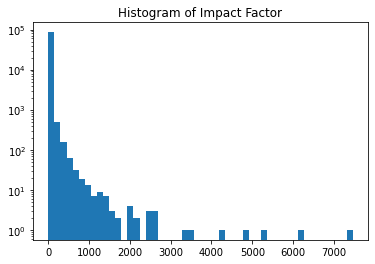

In [18]:
plt.title('Histogram of Impact Factor')
plt.hist(list(venue_impact.values()),bins = 50, log= True)
plt.show()

# H)

In [19]:
list(venue_impact.keys())[list(venue_impact.values()).index(max(list(venue_impact.values())))]

'Challenge of Microprocessors'

*We know that the number of citations is correlated with the venue impact factor. Additionally, the name of venues are stated differently in various records and that these statistics might not be accurate. Thus we should not trust impact factor.*

# I)

In [20]:
venue_impact = {}
for ven in cite_venue_count.keys():   
    venue_impact[ven] = 0    
    if venue != 'None' and pubs_venue_.get(ven) != None and pubs_venue_[ven] >= 10:
        venue_impact[ven] = cite_venue_count[ven]/pubs_venue_[ven]

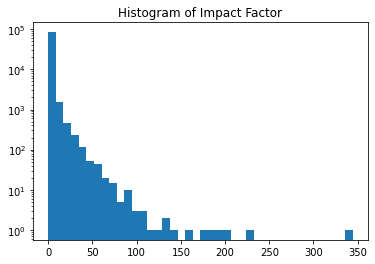

In [21]:
plt.title('Histogram of Impact Factor')
plt.hist(list(venue_impact.values()),bins = 40 ,log= True)
plt.show()

*There is a drastic change in the impact factor as we kept filter with venues that have published 10 or more papers so know we got a histogram that is still  skewed but less compared to previous histogram.*

# J)

In [ ]:
import collections

year_pub = {}
with open("/content/drive/MyDrive/acm.txt" ,"r+", newline = "",encoding="utf8") as infile: 
    year = 0 
    index = 0
    for line in infile:
        if line.startswith("#index"):
            index = int(line[6:])
        elif line.startswith("#t") and len(line) == 7:
            year = int(line[2:])
            if year_pub.get(year) == None:
                year_pub[year] = {"publications":0,"citations":0,"references":0}
                year_pub[year]["publications"] = 1
                if cite.get(index)!= None:
                    year_pub[year]["citations"] = cite.get(index)
                if ref.get(index)!= None:
                    year_pub[year]["references"] = ref.get(index)
            else:
                year_pub[year]["publications"] += 1
                if cite.get(index) != None:
                    year_pub[year]["citations"] += cite.get(index)
                if ref.get(index) != None:
                    year_pub[year]["references"] += ref.get(index)

In [ ]:
avg_year = {}
for year in year_pub.keys():
    avg_year[year] = {}
    avg_year[year]["citations"] = year_pub[year]["citations"]/year_pub[year]["publications"]
    avg_year[year]["references"] = year_pub[year]["references"]/year_pub[year]["publications"]
    
avg_year = collections.OrderedDict(sorted(avg_year.items()))

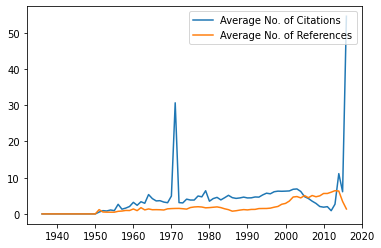

In [ ]:
x = list(avg_year.keys())
x1 = list([avg_year[i]["citations"] for i in x])
x2 = list([avg_year[i]["references"] for i in x])

fig, ax = plt.subplots()

plt.plot( x, x1, label = "Average No. of Citations")
plt.plot( x, x2,  label = "Average No. of References")
legend = ax.legend(loc='upper right')
plt.show()

*The average number of references per publication has been increasing each year, whereas the average number of citations increasead from 1950 to around 2004 and then has dropped.*

# Problem 2 : Kosarak Association Rules

# A)

In [ ]:
import time
start_time = time.process_time()

with open("/content/drive/MyDrive/kosarak.dat") as f:
  lines = f.read().split('\n')

articles = []
users = []

for line in lines:
  stripped_line = line.rstrip()
  if stripped_line != "":
    line_components = stripped_line.split(' ')
    user_articles = set()

    for article in line_components:
      if article != "":
        article_num = int(article)
        if article_num not in articles:
          articles.append(article_num)
        user_articles.add(article_num)
    users.append(sorted(user_articles))

article_strings = [("@attribute news%d {0, 1}" % (num - 1)) for num in articles]
user_strings = ["{%s}" % ",".join("%d 1" % (num - 1) for num in user) for user in users]
all_lines = ["@relation kosarak"] + article_strings + ["@data"] + user_strings

with open("kosarak.arff", "w") as f:
  for line in all_lines:
    f.write(line + "\n")

print(f"Time elapsed: {time.process_time() - start_time} seconds")

Time elapsed: 194.033316969 seconds


# B)

*Time elapsed to convert the kosarak.dat file to a sparse kosarak.arff is 194 seconds*


# C)

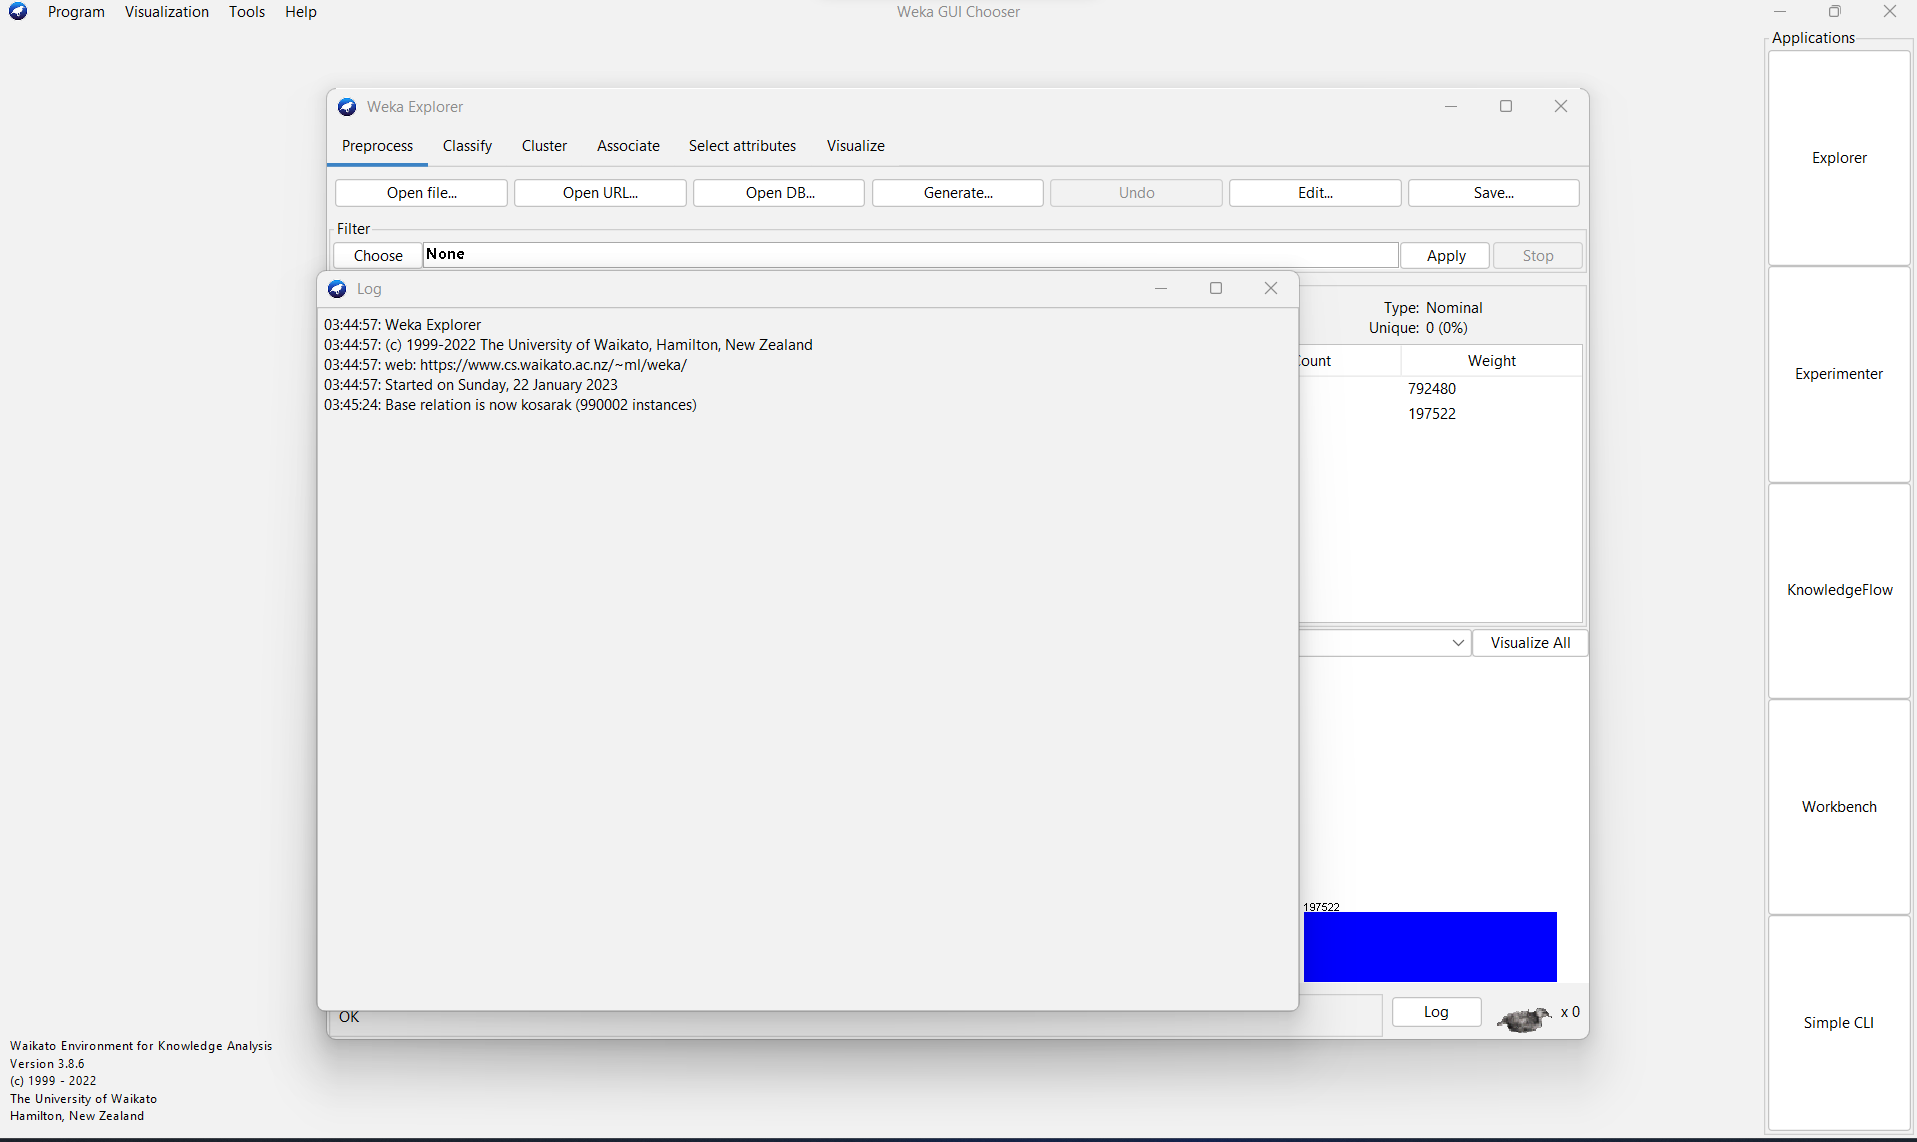

*Loading the resulting file into Weka took 27 seconds*

# D)

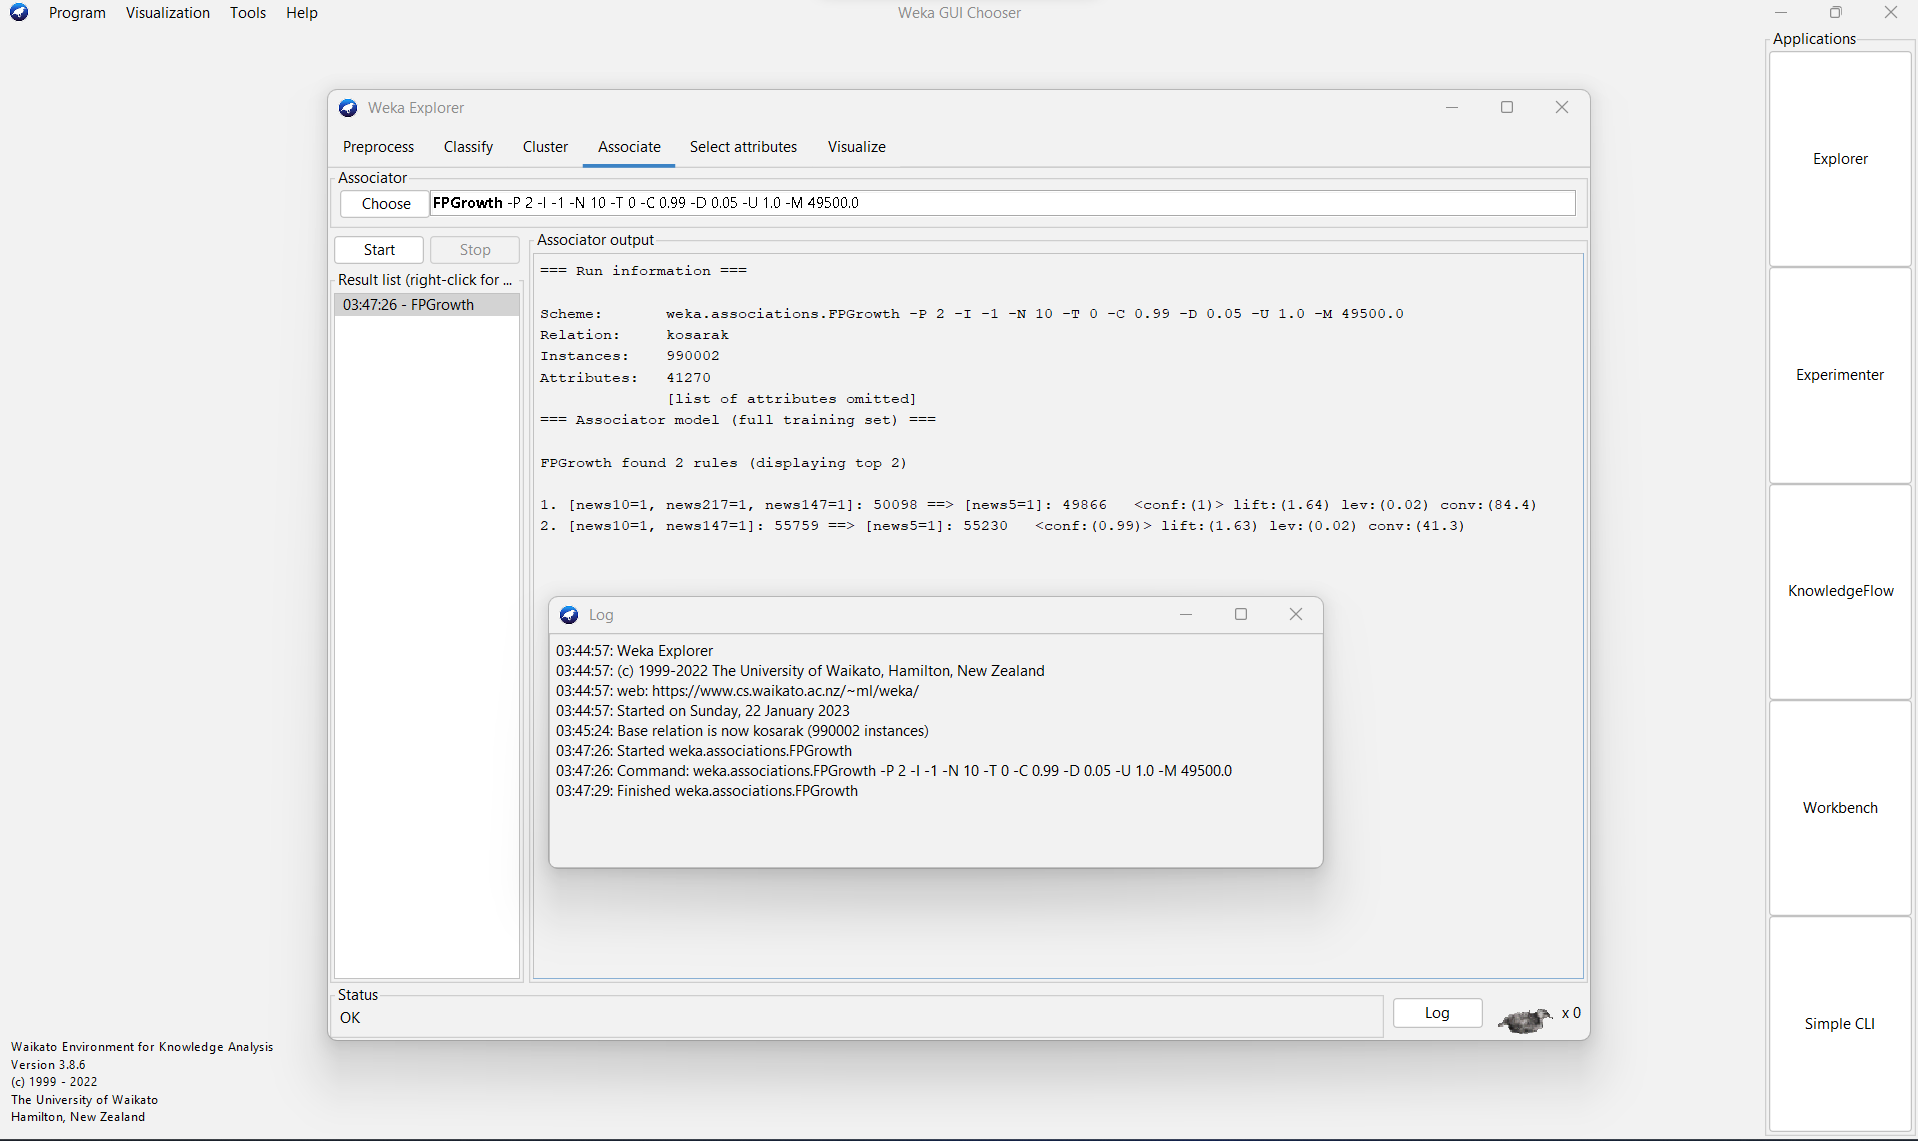

# E)

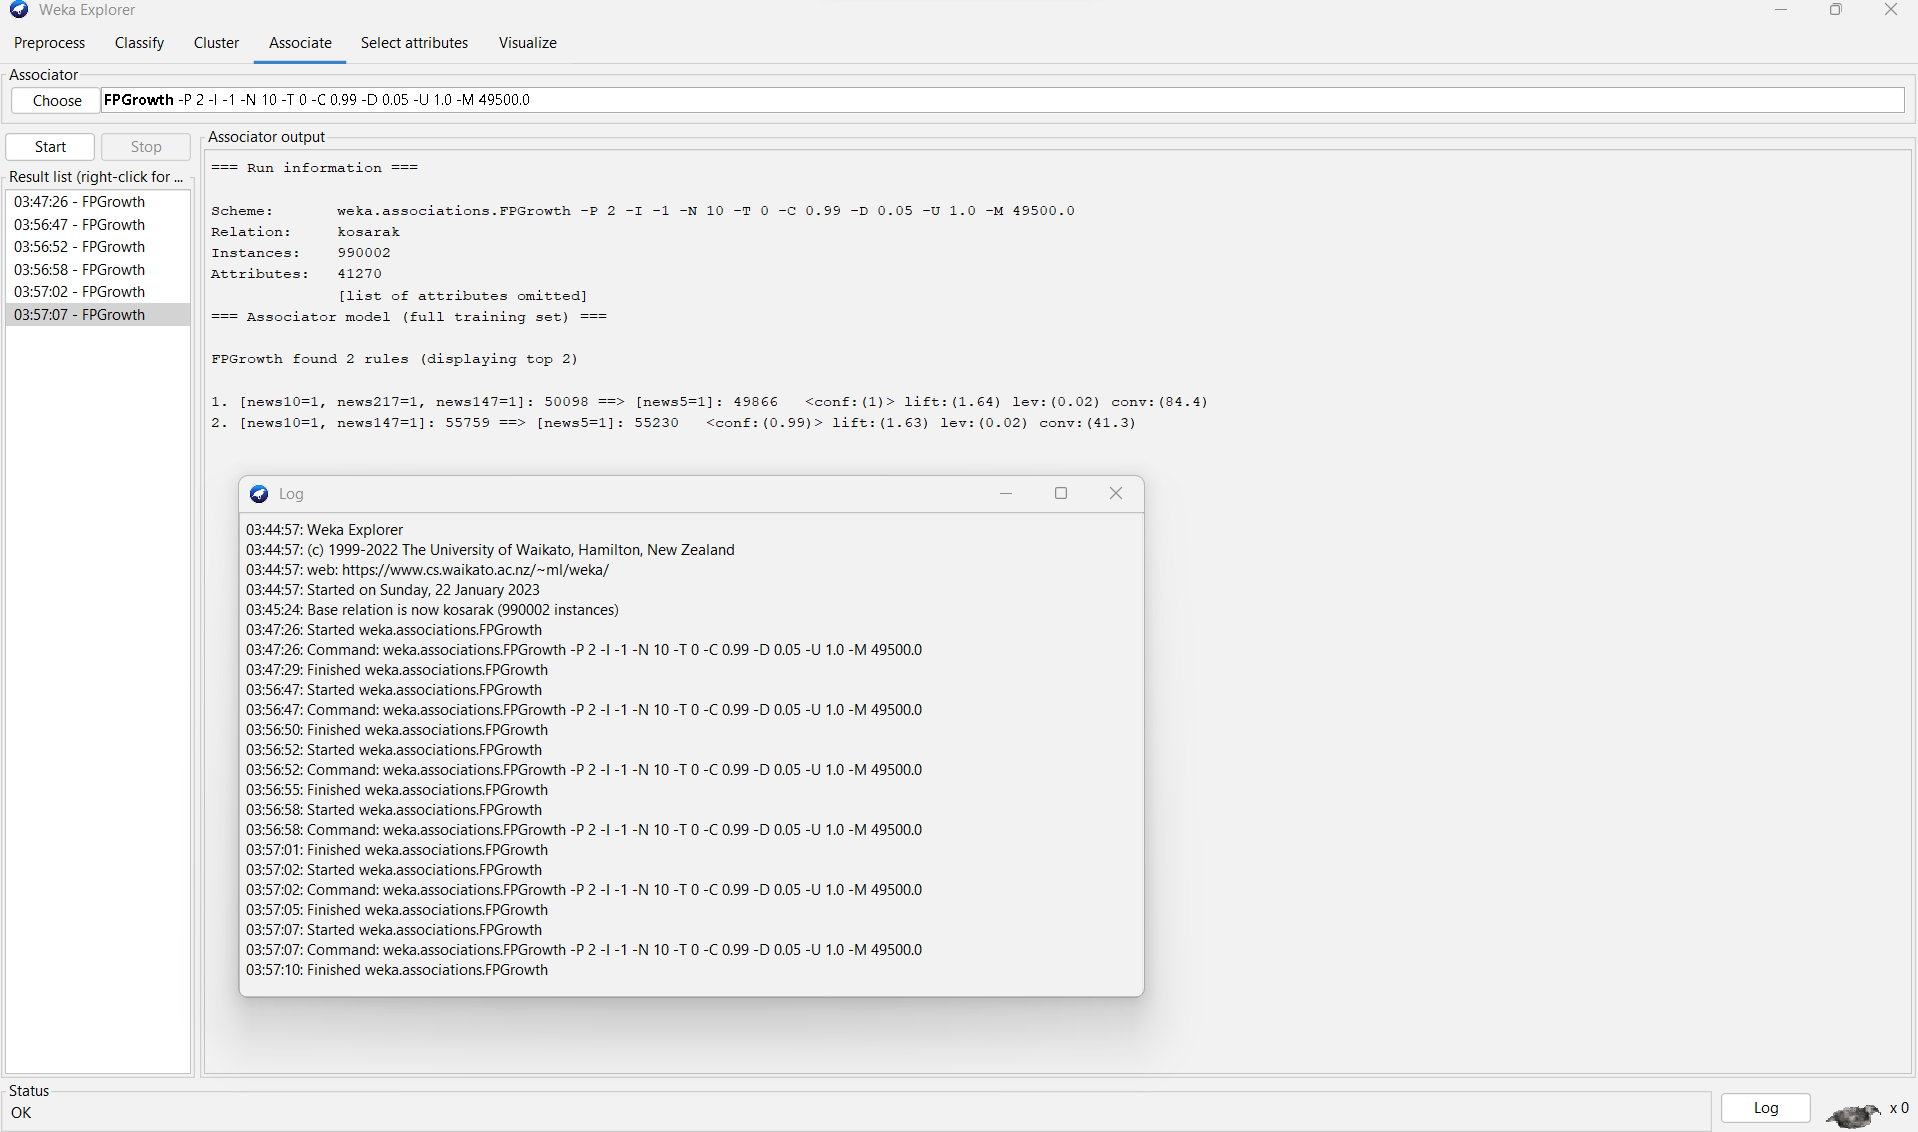

*It takes 5 seconds to run on average. The average time is significantly less than the time necessary to convert the dataset and then load into Weka*

# Problem 3 MNIST. Parse, normalize features, Compute pairwaise similarity matrices

In [37]:
# Load MNIST dataset
mnist = fetch_openml("mnist_784")
X = mnist.data
y = mnist.target

# Create a dataframe from the data and labels
df = pd.DataFrame(X)
df['label'] = y

# Randomize the dataframe
df = df.sample(frac=1, random_state=42)

# Normalize the data
df.iloc[:, :-1] = df.iloc[:, :-1] / 255.0

# Split the dataframe into train, validation, and test sets
train_df, val_and_test_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(val_and_test_df, test_size=0.5, random_state=42)

In [38]:
# Access train data
X_train = train_df.iloc[:, :-1]
y_train = train_df.iloc[:, -1]

# Access validation data
X_val = val_df.iloc[:, :-1]
y_val = val_df.iloc[:, -1]

# Access test data
X_test = test_df.iloc[:, :-1]
y_test = test_df.iloc[:, -1]

In [39]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance

cosine_similarity = cosine_similarity(X_train[0:1000],X_test[0:1000])
pd.DataFrame(cosine_similarity).head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.551144,0.469566,0.448152,0.245708,0.356309,0.452462,0.257069,0.423434,0.356337,0.561108,...,0.352701,0.397865,0.404287,0.372075,0.554093,0.350468,0.475610,0.313171,0.471015,0.661473
1,0.382656,0.370046,0.530117,0.398405,0.478537,0.425578,0.615472,0.843360,0.422943,0.485541,...,0.305979,0.458126,0.597882,0.500131,0.525505,0.390680,0.578211,0.524938,0.585936,0.524674
2,0.310248,0.457490,0.339790,0.198726,0.357188,0.395585,0.459584,0.384409,0.495801,0.496352,...,0.388656,0.501868,0.731106,0.440520,0.364897,0.444252,0.359865,0.478044,0.495600,0.490849
3,0.485382,0.418995,0.480378,0.305639,0.330039,0.477089,0.244072,0.287121,0.488368,0.458880,...,0.522282,0.306774,0.358354,0.331980,0.379201,0.276130,0.441837,0.504785,0.484768,0.461031
4,0.122312,0.150346,0.307128,0.277546,0.294933,0.300244,0.226405,0.356087,0.198791,0.342281,...,0.210254,0.085048,0.225019,0.128621,0.273575,0.089621,0.389943,0.204685,0.280145,0.226754


In [40]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_dist = euclidean_distances(X_train[0:1000],X_test[0:1000])
pd.DataFrame(euclidean_dist).head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,8.916407,9.427856,10.500139,10.435508,10.241900,10.932743,11.341094,10.575030,10.488715,10.940891,...,10.143094,9.394879,11.546231,10.063239,9.009881,9.484324,10.175082,11.102825,9.931464,8.462135
1,10.698294,10.526647,9.878821,9.715684,9.504654,11.383048,8.403069,5.627629,10.190262,11.900676,...,10.779673,9.265381,9.663427,9.273492,9.511754,9.560463,9.307651,9.461065,8.985259,10.181340
2,11.499357,9.983889,11.883041,11.292863,10.719255,11.825811,10.114415,11.325102,9.725265,11.880702,...,10.357956,9.162042,8.006700,9.989442,11.181114,9.455518,11.639178,10.089616,10.080202,10.678546
3,9.919100,10.276556,10.509710,10.543785,10.888997,10.972511,11.876366,12.146666,9.754720,12.273801,...,9.189399,10.516993,12.294694,10.820368,11.016511,10.465101,10.834545,9.794720,10.151390,10.955197
4,12.465427,11.906367,11.774503,10.246070,10.722968,12.350526,11.585536,11.187023,11.705626,13.217511,...,11.186359,11.404786,13.153047,11.824770,11.508962,11.000879,10.984726,11.959653,11.598038,12.751545


In [41]:
from sklearn.metrics.pairwise import manhattan_distances
man_dist = manhattan_distances(X_train[0:1000],X_test[0:1000])
pd.DataFrame(man_dist).head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,107.733333,111.380392,138.925490,137.627451,130.298039,150.694118,154.607843,143.823529,139.278431,148.180392,...,133.792157,111.301961,162.772549,123.376471,106.545098,112.145098,132.862745,153.611765,128.282353,97.376471
1,140.792157,130.023529,122.925490,118.372549,110.956863,159.509804,93.635294,53.031373,130.658824,168.039216,...,143.894118,104.815686,117.635294,103.619608,113.988235,109.447059,112.345098,113.533333,105.662745,128.592157
2,160.066667,121.541176,168.560784,153.701961,136.756863,169.600000,125.764706,156.886275,122.521569,169.164706,...,137.874510,104.443137,88.737255,120.188235,149.850980,109.019608,163.760784,128.423529,130.380392,140.235294
3,129.329412,130.364706,139.243137,139.529412,144.050980,153.043137,168.925490,179.341176,124.874510,182.058824,...,114.933333,136.019608,180.321569,141.584314,149.537255,133.207843,149.149020,124.996078,132.207843,149.521569
4,185.403922,165.129412,167.662745,133.203922,140.054902,186.286275,162.239216,155.580392,167.662745,206.172549,...,157.596078,155.819608,203.149020,164.058824,161.133333,145.023529,149.882353,174.960784,166.541176,192.717647


In [45]:
def edit_distance(df, index, threshold):
    x = df.iloc[index, :-1].to_numpy()
    edit_sim = []
    for i in range(df.shape[0]):
        y = df.iloc[i, :-1].to_numpy()
        diff = np.sum(x != y)/2
        if diff < threshold:
            edit_sim.append(diff)
    return edit_sim

In [46]:
edit_mat = []
threshold = 784
for i in range(train_df[:100].shape[0]):
  edit_mat.append(edit_distance(train_df[:100], i, threshold=threshold))

In [47]:
# Edit distance for train set
pd.DataFrame(edit_mat)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,125.0,135.5,147.0,141.0,113.0,129.5,132.5,106.0,120.0,...,145.5,128.5,149.0,96.5,110.5,130.0,147.5,115.0,111.5,117.5
1,125.0,0.0,117.0,141.5,134.0,111.0,124.0,139.0,113.0,108.5,...,127.5,108.0,147.5,96.5,109.5,120.0,157.5,103.0,107.0,114.5
2,135.5,117.0,0.0,129.0,154.5,132.0,134.5,140.5,127.5,122.0,...,129.5,122.0,148.0,102.5,116.5,129.5,159.0,125.0,119.5,138.5
3,147.0,141.5,129.0,0.0,146.0,135.5,135.0,128.5,123.5,127.5,...,129.0,120.5,141.5,115.0,133.0,138.5,146.5,126.5,119.5,143.0
4,141.0,134.0,154.5,146.0,0.0,110.5,149.5,132.0,120.5,102.5,...,128.0,134.0,146.0,113.0,135.5,150.5,141.0,119.0,126.0,134.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,130.0,120.0,129.5,138.5,150.5,128.0,114.0,142.0,109.5,125.5,...,129.5,111.0,147.0,105.5,117.5,0.0,162.5,104.0,111.5,127.0
96,147.5,157.5,159.0,146.5,141.0,133.5,151.5,121.0,140.5,142.5,...,136.0,146.0,135.0,124.5,138.5,162.5,0.0,140.5,139.5,140.5
97,115.0,103.0,125.0,126.5,119.0,95.0,117.0,118.5,96.5,93.0,...,121.5,94.5,134.0,84.5,97.5,104.0,140.5,0.0,76.0,107.5
98,111.5,107.0,119.5,119.5,126.0,98.5,114.5,113.5,97.5,96.5,...,121.5,84.5,128.5,73.5,93.0,111.5,139.5,76.0,0.0,111.0


In [ ]:
edit_mat = []
threshold = 784
for i in range(val_df[:100].shape[0]):
  edit_mat.append(edit_distance(val_df[:100], i, threshold=threshold))

In [ ]:
# Edit distance for validation set
pd.DataFrame(edit_mat)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,131.0,98.5,141.5,136.5,128.5,82.0,97.0,114.0,82.5,...,120.5,88.5,109.5,81.0,108.0,128.0,87.0,90.0,107.5,98.0
1,131.0,0.0,141.0,135.0,161.0,152.5,133.5,144.5,137.5,130.0,...,127.0,132.5,131.0,123.0,110.5,139.0,134.0,133.5,151.0,138.0
2,98.5,141.0,0.0,147.5,138.0,132.5,98.5,113.0,132.5,106.0,...,125.0,91.5,104.5,87.5,123.5,145.5,87.0,90.5,112.5,107.5
3,141.5,135.0,147.5,0.0,143.5,144.0,133.0,149.0,133.0,143.0,...,133.0,128.5,138.0,123.0,115.0,149.5,131.0,133.0,151.0,134.0
4,136.5,161.0,138.0,143.5,0.0,119.5,129.5,148.0,142.5,135.0,...,162.5,123.0,126.0,121.5,151.0,156.5,113.0,121.0,138.0,129.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,128.0,139.0,145.5,149.5,156.5,158.5,129.0,149.0,147.0,136.5,...,138.5,131.5,136.5,131.0,115.5,0.0,138.5,135.0,138.5,142.5
96,87.0,134.0,87.0,131.0,113.0,108.5,76.0,100.0,121.0,92.5,...,120.0,71.5,98.0,67.5,110.5,138.5,0.0,76.0,101.0,85.5
97,90.0,133.5,90.5,133.0,121.0,113.0,88.5,106.0,122.5,99.5,...,117.0,78.0,97.5,69.5,111.5,135.0,76.0,0.0,94.0,104.5
98,107.5,151.0,112.5,151.0,138.0,135.0,109.5,114.0,141.0,110.5,...,136.5,96.0,124.5,81.0,131.5,138.5,101.0,94.0,0.0,121.5


In [ ]:
edit_mat = []
threshold = 784
for i in range(test_df[:100].shape[0]):
  edit_mat.append(edit_distance(test_df[:100], i, threshold=threshold))

In [ ]:
# Edit distance for test set
pd.DataFrame(edit_mat)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,98.0,114.5,104.0,97.5,123.0,110.0,131.5,112.5,131.5,...,116.0,103.5,93.5,106.5,112.0,155.5,133.0,120.5,128.5,98.5
1,98.0,0.0,97.0,77.5,82.0,130.5,98.0,113.0,83.0,124.5,...,93.5,83.0,52.5,92.0,98.0,125.5,102.5,106.0,109.5,88.5
2,114.5,97.0,0.0,97.5,102.5,142.0,105.0,122.5,109.5,144.5,...,117.5,116.0,97.5,103.5,112.5,139.5,127.0,121.5,134.0,96.0
3,104.0,77.5,97.5,0.0,69.5,130.5,89.5,107.0,97.0,133.5,...,79.0,102.0,75.5,82.5,93.5,127.0,108.0,96.5,109.5,84.5
4,97.5,82.0,102.5,69.5,0.0,121.5,93.0,106.5,99.5,132.0,...,95.0,97.5,80.5,89.5,99.5,131.5,111.0,93.0,115.0,76.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,155.5,125.5,139.5,127.0,131.5,142.0,128.0,125.5,126.0,164.5,...,134.5,152.0,123.0,126.5,134.5,0.0,142.5,137.5,136.5,131.0
96,133.0,102.5,127.0,108.0,111.0,145.5,119.0,132.0,109.0,149.0,...,124.5,115.0,101.5,120.0,126.5,142.5,0.0,127.0,125.5,118.5
97,120.5,106.0,121.5,96.5,93.0,139.0,113.0,116.0,115.0,147.0,...,97.5,123.0,105.5,108.5,116.5,137.5,127.0,0.0,121.5,105.5
98,128.5,109.5,134.0,109.5,115.0,121.5,115.5,117.0,121.0,118.5,...,115.0,123.0,107.5,119.0,133.0,136.5,125.5,121.5,0.0,111.5


# 20 NG . Parse, normalize features, Compute pairwaise similarity matrices

In [ ]:
# fetch the 20NG dataset
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')

# create a dataframe of the 20NG data
df = pd.DataFrame({'text': newsgroups_train.data, 'target': newsgroups_train.target})

# randomize the dataframe
df = df.sample(frac=1).reset_index(drop=True)

# create a tf-idf vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')

# fit and transform the text data
X = tfidf_vectorizer.fit_transform(df['text'])

# split the data into train, validation and test sets
X_train, X_val_and_test, y_train, y_val_and_test = train_test_split(X, df['target'], test_size=0.2)
X_val, X_test, y_val, y_test = train_test_split(X_val_and_test, y_val_and_test, test_size=0.5)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = cosine_similarity(X_train, X_train)
pd.DataFrame(cosine_sim).head()

,0,1,2,3,4,5,6,7,8,9,...,9041,9042,9043,9044,9045,9046,9047,9048,9049,9050
0,1.000000,0.017138,0.009151,0.004902,0.008833,0.009690,0.004817,0.010711,0.010845,0.013650,...,0.015075,0.010295,0.004806,0.006143,0.011007,0.008345,0.002273,0.007162,0.010435,0.005124
1,0.017138,1.000000,0.003751,0.003326,0.009860,0.009547,0.013952,0.019592,0.016249,0.047830,...,0.022989,0.013859,0.010166,0.011295,0.013259,0.018941,0.010386,0.004867,0.008551,0.013286
2,0.009151,0.003751,1.000000,0.000601,0.006716,0.006882,0.017157,0.001611,0.005088,0.005740,...,0.012676,0.012290,0.002989,0.008266,0.014022,0.001136,0.000788,0.008420,0.014418,0.001312
3,0.004902,0.003326,0.000601,1.000000,0.002027,0.001911,0.002131,0.012598,0.000335,0.003614,...,0.001948,0.004788,0.002041,0.001365,0.008089,0.007732,0.000461,0.003743,0.005250,0.013637
4,0.008833,0.009860,0.006716,0.002027,1.000000,0.153154,0.003370,0.005808,0.018986,0.010016,...,0.026273,0.005881,0.014294,0.022903,0.019385,0.005165,0.013275,0.010721,0.012426,0.009338


In [ ]:
cosine_sim = cosine_similarity(X_train, X_test)
pd.DataFrame(cosine_sim).head()

,0,1,2,3,4,5,6,7,8,9,...,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131
0,0.002685,0.008167,0.009851,0.095065,0.004955,0.007658,0.000729,0.006068,0.006256,0.002902,...,0.004275,0.013213,0.004657,0.016767,0.014249,0.003469,0.012419,0.004974,0.021433,0.004182
1,0.005428,0.008122,0.017439,0.011899,0.000329,0.004142,0.003087,0.009721,0.011957,0.016968,...,0.011588,0.016838,0.005963,0.006708,0.011579,0.004106,0.009017,0.003364,0.017946,0.006132
2,0.001517,0.011776,0.000564,0.008982,0.009936,0.005624,0.009756,0.009870,0.004064,0.003661,...,0.007733,0.001371,0.011329,0.000638,0.002675,0.004118,0.003618,0.000923,0.010339,0.004323
3,0.004535,0.005247,0.000330,0.014003,0.007777,0.121786,0.001574,0.000615,0.004351,0.004343,...,0.005288,0.013764,0.020657,0.026606,0.000829,0.008395,0.009852,0.014898,0.001358,0.000697
4,0.001613,0.020262,0.007019,0.014113,0.000957,0.006461,0.024513,0.018035,0.007276,0.021708,...,0.006400,0.010810,0.002114,0.002044,0.006792,0.005192,0.011274,0.000981,0.018290,0.055365


In [ ]:
from sklearn.metrics.pairwise import euclidean_distances
euclidean_dist = euclidean_distances(X_train, X_train)
pd.DataFrame(euclidean_dist).head()

,0,1,2,3,4,5,6,7,8,9,...,9041,9042,9043,9044,9045,9046,9047,9048,9049,9050
0,0.000000,1.402043,1.407728,1.410743,1.407954,1.407345,1.410803,1.406619,1.406524,1.404529,...,1.403514,1.406915,1.410811,1.409863,1.406409,1.408300,1.412606,1.409140,1.406815,1.410585
1,1.402043,0.000000,1.411559,1.411860,1.407224,1.407447,1.404313,1.400292,1.402676,1.379979,...,1.397863,1.404380,1.407007,1.406204,1.404807,1.400756,1.406850,1.410768,1.408154,1.404788
2,1.407728,1.411559,0.000000,1.413789,1.409457,1.409339,1.402029,1.413074,1.410611,1.410149,...,1.405222,1.405497,1.412099,1.408357,1.404264,1.413410,1.413657,1.408247,1.403981,1.413285
3,1.410743,1.411860,1.413789,0.000000,1.412780,1.412862,1.412706,1.405277,1.413977,1.411656,...,1.412836,1.410824,1.412770,1.413248,1.408482,1.408735,1.413887,1.411564,1.410496,1.404538
4,1.407954,1.407224,1.409457,1.412780,0.000000,1.301419,1.411829,1.410101,1.400724,1.407113,...,1.395512,1.410049,1.404070,1.397925,1.400439,1.410557,1.404795,1.406612,1.405400,1.407595


In [ ]:
euclidean_dist = euclidean_distances(X_train, X_test)
pd.DataFrame(euclidean_dist).head()

,0,1,2,3,4,5,6,7,8,9,...,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131
0,1.412314,1.408427,1.407230,1.345314,1.410705,1.408788,1.413698,1.409917,1.409783,1.412160,...,1.411187,1.404840,1.410917,1.402307,1.404102,1.411759,1.405404,1.410692,1.398976,1.411253
1,1.410370,1.408459,1.401828,1.405774,1.413981,1.411281,1.412029,1.407323,1.405733,1.402164,...,1.405995,1.402257,1.409991,1.409463,1.406002,1.411307,1.407823,1.411833,1.401466,1.409871
2,1.413140,1.405862,1.413815,1.407848,1.407170,1.410231,1.407298,1.407217,1.411337,1.411622,...,1.408735,1.413244,1.406180,1.413762,1.412321,1.411299,1.411653,1.413561,1.406884,1.411153
3,1.411003,1.410499,1.413980,1.404277,1.408704,1.325303,1.413100,1.413778,1.411134,1.411139,...,1.410470,1.404447,1.399530,1.395273,1.413627,1.408265,1.407230,1.403640,1.413253,1.413720
4,1.413073,1.399813,1.409242,1.404199,1.413536,1.409638,1.396772,1.401403,1.409059,1.398780,...,1.409681,1.406549,1.412718,1.412768,1.409403,1.410537,1.406219,1.413519,1.401221,1.374507


In [ ]:
from sklearn.metrics.pairwise import manhattan_distances
man_dist = manhattan_distances(X_train, X_train)
pd.DataFrame(man_dist).head()

,0,1,2,3,4,5,6,7,8,9,...,9041,9042,9043,9044,9045,9046,9047,9048,9049,9050
0,0.000000,16.537254,12.906956,13.431233,13.071036,11.620517,15.634167,14.668632,13.869783,20.916289,...,14.436733,12.835467,11.903286,13.198076,13.517525,14.223286,13.887345,12.992077,13.841074,17.881871
1,16.537254,0.000000,15.955328,16.373900,15.968563,14.528524,18.365641,17.312951,16.478615,22.885577,...,17.073673,15.681744,14.598304,15.926461,16.330229,16.991106,16.498530,16.002780,16.823840,20.344375
2,12.906956,15.955328,0.000000,12.528750,12.094156,10.757008,14.556187,13.952227,13.047325,20.185722,...,13.596130,11.874953,10.962025,12.211609,12.351042,13.412967,12.868199,11.920463,12.801404,17.033517
3,13.431233,16.373900,12.528750,0.000000,12.671767,11.225907,15.127569,14.217366,13.563750,20.540680,...,14.233885,12.433656,11.434250,12.791425,13.031127,13.702396,13.300917,12.521044,13.400223,17.098831
4,13.071036,15.968563,12.094156,12.671767,0.000000,8.934550,14.827226,13.939693,12.805644,20.276394,...,13.472018,12.039624,10.754709,12.080882,12.403873,13.390876,12.903872,11.993234,13.031658,16.943102


In [ ]:
man_dist = manhattan_distances(X_train, X_test)
pd.DataFrame(man_dist).head()

,0,1,2,3,4,5,6,7,8,9,...,1122,1123,1124,1125,1126,1127,1128,1129,1130,1131
0,11.320100,12.439387,16.098001,12.926637,11.054268,12.234468,14.249082,11.513673,16.407813,21.058705,...,13.472105,17.009742,13.659902,15.313729,13.471071,10.674316,15.508150,10.838840,14.349715,11.857233
1,14.167061,15.373587,18.937904,16.485520,14.098221,15.300700,17.082400,14.299732,18.889377,23.310379,...,16.204780,19.721687,16.458312,18.414414,16.384006,13.558696,18.507113,13.747792,17.281934,14.716185
2,10.269879,11.417817,15.421095,12.655054,9.867887,11.337849,12.956545,10.279001,15.484366,20.013643,...,12.371917,16.322440,12.446376,14.704139,12.764678,9.548081,14.817362,9.838138,13.687331,10.758215
3,10.652363,11.959967,15.833618,13.135207,10.361588,10.771045,13.554076,11.027128,15.792368,20.325074,...,12.912186,16.406734,12.913063,14.757076,13.216430,9.918301,14.969615,9.971332,14.280822,11.320592
4,10.461246,11.231110,15.384457,12.650299,10.278495,11.483522,13.011516,10.221853,15.565486,20.002654,...,12.525417,16.229325,12.847978,14.834166,12.837901,9.735013,14.770504,10.031888,13.592418,10.508789


In [ ]:
# create a Count Vectorizer
count_vectorizer = CountVectorizer(stop_words = 'english')
# fit and transform the text data
X = count_vectorizer.fit_transform(newsgroups_train.data[:100])

In [ ]:
def edit_distance(df, index, threshold):
    x = df[index]
    edit_sim = []
    for i in range(df.shape[0]):
        y = df[i]
        diff = np.sum(x != y)/2
        if diff > threshold:
            edit_sim.append(diff)
        else:
          edit_sim.append(0)
        edit_sim.append(diff)
    return edit_sim

In [ ]:
edit_dist = []
threshold = 100
for i in range(X.shape[0]):
  edit_dist.append(edit_distance(X, i, threshold=threshold))

# Edit distance for 20NG
pd.DataFrame(edit_dist)

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.0,0.0,0.0,51.0,0.0,88.0,0.0,52.5,0.0,67.0,...,0.0,47.0,122.0,122.0,0.0,64.5,0.0,45.5,0.0,51.5
1,0.0,51.0,0.0,0.0,0.0,94.5,0.0,59.5,0.0,73.5,...,0.0,51.0,124.0,124.0,0.0,68.0,0.0,50.0,0.0,59.5
2,0.0,88.0,0.0,94.5,0.0,0.0,0.0,95.0,104.5,104.5,...,0.0,91.0,162.5,162.5,107.0,107.0,0.0,88.5,0.0,96.0
3,0.0,52.5,0.0,59.5,0.0,95.0,0.0,0.0,0.0,70.0,...,0.0,54.5,125.5,125.5,0.0,68.0,0.0,52.5,0.0,56.0
4,0.0,67.0,0.0,73.5,104.5,104.5,0.0,70.0,0.0,0.0,...,0.0,68.0,139.5,139.5,0.0,82.5,0.0,63.5,0.0,70.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,47.0,0.0,51.0,0.0,91.0,0.0,54.5,0.0,68.0,...,0.0,0.0,121.5,121.5,0.0,61.0,0.0,47.0,0.0,54.5
96,122.0,122.0,124.0,124.0,162.5,162.5,125.5,125.5,139.5,139.5,...,121.5,121.5,0.0,0.0,135.5,135.5,117.5,117.5,118.5,118.5
97,0.0,64.5,0.0,68.0,107.0,107.0,0.0,68.0,0.0,82.5,...,0.0,61.0,135.5,135.5,0.0,0.0,0.0,62.5,0.0,71.0
98,0.0,45.5,0.0,50.0,0.0,88.5,0.0,52.5,0.0,63.5,...,0.0,47.0,117.5,117.5,0.0,62.5,0.0,0.0,0.0,49.5


# Problem 4: MNIST, 20 NG : Train and test KNN classification


# MNIST

In [ ]:
# Load the MNIST data
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
pd.DataFrame(y_train).value_counts() 

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

In [ ]:
# Getting samples from training data

for i in range(10):
    if i ==0:
        train_images_arr = X_train[np.array(np.where(y_train == i)).flatten()[:2500]]
        train_labels_arr = y_train[np.array(np.where(y_train == i)).flatten()[:2500]]
        
        
    else:
        train_images_arr = np.vstack((train_images_arr, X_train[np.array(np.where(y_train == i)).flatten()[:2500]]))
        train_labels_arr = np.hstack((train_labels_arr, y_train[np.array(np.where(y_train == i)).flatten()[:2500]]))
        
from sklearn.utils import shuffle
train_images_arr, train_labels_arr = shuffle(train_images_arr, train_labels_arr, random_state=0)

del(X_train)
del(y_train) #this is done to save memory

In [ ]:
#Training dataset changing shape

for i in range(train_images_arr.shape[0]):
    if i ==0:
        x_train_reshaped = train_images_arr[i].reshape(1,-1)
        
    else:
        x_train_reshaped = np.vstack((x_train_reshaped, train_images_arr[i].reshape(1,-1)))
        
del(train_images_arr)# this is done to save memory 

In [ ]:
#Testing dataset 

x_test_reshaped = np.array([])
for i in range(X_test.shape[0]):
    if i ==0:
        x_test_reshaped = X_test[i].reshape(1,-1)
        
    else:
        x_test_reshaped = np.vstack((x_test_reshaped, X_test[i].reshape(1,-1)))
        
del(X_test) # this is done to save memory 

In [ ]:
x_test_reshaped.shape

(10000, 784)

In [ ]:
x_train_reshaped.shape

(25000, 784)

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

euc_dis = euclidean_distances(x_test_reshaped,x_train_reshaped)
train_euc_dis = euclidean_distances(x_train_reshaped,x_train_reshaped)

In [ ]:
training_accuracy = [] 
for i in range(train_euc_dis.shape[0]):
    
    indx = np.argsort(train_euc_dis[i])[:5]
    indx = train_labels_arr[indx]
    
    if len(np.unique(indx)) == 1:
        training_accuracy.append(np.unique(indx)[0])
    
    else:
        training_accuracy.append(np.bincount(indx).argmax())

In [ ]:
testing_accuracy = [] 
for i in range(euc_dis.shape[0]):
    indx = np.argsort(euc_dis[i])[:5]
    indx = train_labels_arr[indx]
    
    if len(np.unique(indx)) == 1:
        testing_accuracy.append(np.unique(indx)[0])
    
    else:
        testing_accuracy.append(np.bincount(indx).argmax())

In [ ]:
from sklearn.metrics import accuracy_score

train_acc = accuracy_score(train_labels_arr,training_accuracy)*100 
test_acc = accuracy_score(y_test,testing_accuracy)*100 

print('Training performance - ',train_acc)
print('Testing performance - ',test_acc)

Training performance -  97.63199999999999
Testing performance -  95.86


# 20 NG

In [ ]:
newsgroup_train = fetch_20newsgroups(subset='train')
newsgroup_test = fetch_20newsgroups(subset='test')

print(len(newsgroup_train.data))
print(len(newsgroup_test.data))

11314
7532


In [ ]:
y_train = newsgroup_train.target
y_test = newsgroup_test.target

In [ ]:
vectorizer = TfidfVectorizer()
train_data = vectorizer.fit_transform(newsgroup_train.data)
test_data = vectorizer.transform(newsgroup_test.data)

In [ ]:
test_data.shape

(7532, 130107)

In [ ]:
len(newsgroup_test.data)

7532

In [ ]:
# Compute distances between all examples in the training set
train_dist = euclidean_distances(train_data,train_data)

# Compute distances between all examples in the test set
test_dist = euclidean_distances(test_data,train_data)

In [ ]:
print(train_dist.shape)
print(test_dist.shape)

(11314, 11314)
(7532, 11314)


In [ ]:
training_accuracy = [] 
for i in range(train_dist.shape[0]):
    
    # Sort by distance and return indices of the first 3 neighbors
    k_index = np.argsort(train_dist[i])[:3]
    k_index = y_train[k_index]
    
    if len(np.unique(k_index)) == 1:
        training_accuracy.append(np.unique(k_index)[0])
    
    else:
        training_accuracy.append(np.bincount(k_index).argmax())

In [ ]:
testing_accuracy = [] 

for i in range(test_dist.shape[0]):
    
    k_index = np.argsort(test_dist[i])[:3]
    k_index = y_train[k_index]
    
    if len(np.unique(k_index)) == 1:
        testing_accuracy.append(np.unique(k_index)[0])
    
    else:
        testing_accuracy.append(np.bincount(k_index).argmax())

In [ ]:
train_acc = accuracy_score(y_train,training_accuracy)*100 
test_acc = accuracy_score(y_test,testing_accuracy)*100 

print('Training performance : ', train_acc)
print('Testing performance : ', test_acc)

Training performance :  91.04649107300689
Testing performance :  65.78597981943707
